<a href="https://colab.research.google.com/github/Izmahikmah/food_delivery_analys/blob/main/Analisis_Food_Delivery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/Data Analyst/food_delivery_datasets.csv'
food_delivery_datasets = pd.read_csv(path)

food_delivery_datasets.head()

,order_id,voucher_amount,date_time,eta_seconds,food_price,cust_id,rating,delivery_fee,resto_id,status,random_id
0,FOOD-10455,0,2018-08-12T20:35:08.001006,1800,18900,1089034,5.0,4000,742638033,Completed,0.511149
1,FOOD-10985,0,2018-09-23T17:44:12.243273,2173,149000,180146,5.0,11000,742767245,Completed,0.832936
2,FOOD-10911,0,2018-09-19T18:08:09.387991,1418,43800,366528,NaN,9000,742618303,Completed,0.828026
3,FOOD-10932,0,2018-09-21T01:24:35.272499,1903,39900,511038,5.0,14000,742541172,Completed,0.239377
4,FOOD-10961,0,2018-09-22T17:57:45.523161,1716,77700,1220358,NaN,4000,742604875,Completed,0.995587


In [5]:
food_delivery_datasets['total_pemasukan']=food_delivery_datasets['food_price']+food_delivery_datasets['delivery_fee']-food_delivery_datasets['voucher_amount']
food_delivery_datasets.head()

,order_id,voucher_amount,date_time,eta_seconds,food_price,cust_id,rating,delivery_fee,resto_id,status,random_id,total_pemasukan
0,FOOD-10455,0,2018-08-12T20:35:08.001006,1800,18900,1089034,5.0,4000,742638033,Completed,0.511149,22900
1,FOOD-10985,0,2018-09-23T17:44:12.243273,2173,149000,180146,5.0,11000,742767245,Completed,0.832936,160000
2,FOOD-10911,0,2018-09-19T18:08:09.387991,1418,43800,366528,NaN,9000,742618303,Completed,0.828026,52800
3,FOOD-10932,0,2018-09-21T01:24:35.272499,1903,39900,511038,5.0,14000,742541172,Completed,0.239377,53900
4,FOOD-10961,0,2018-09-22T17:57:45.523161,1716,77700,1220358,NaN,4000,742604875,Completed,0.995587,81700


In [7]:
food_delivery_datasets=pd.concat([food_delivery_datasets['resto_id'],food_delivery_datasets['total_pemasukan'],food_delivery_datasets['status']], axis=1)
food_delivery_datasets.columns = ['resto_id','total_pemasukan','status']
food_delivery_datasets.head()

,resto_id,total_pemasukan,status
0,742638033,22900,Completed
1,742767245,160000,Completed
2,742618303,52800,Completed
3,742541172,53900,Completed
4,742604875,81700,Completed


In [8]:
food_delivery_datasets[food_delivery_datasets["status"]=="Completed"]

,resto_id,total_pemasukan,status
0,742638033,22900,Completed
1,742767245,160000,Completed
2,742618303,52800,Completed
3,742541172,53900,Completed
4,742604875,81700,Completed
...,...,...,...
1071,742742150,107200,Completed
1072,742566851,147700,Completed
1073,742571888,192200,Completed
1074,742725064,58300,Completed


In [9]:
fd1=food_delivery_datasets.groupby(['resto_id'])
fd1=fd1[['total_pemasukan']].sum()
fd1['total_order']=food_delivery_datasets.groupby(['resto_id']).size()
fd1.reset_index()

,resto_id,total_pemasukan,total_order
0,200000639,69100,1
1,200000964,96600,2
2,200001006,38900,1
3,200001973,164700,1
4,200001979,140800,1
...,...,...,...
666,742808523,49100,1
667,742809792,29100,1
668,742810086,134400,1
669,742813095,97900,2


In [10]:
A=[]
for i in range (1,672):
  A.append(i)
  i+=1

In [13]:
final_fd1=fd1.sort_values(by='total_pemasukan',ascending=True)
final_fd1['order_ID']=A
final_fd1.reset_index()

,resto_id,total_pemasukan,total_order,order_ID
0,742699034,7600,1,1
1,742591128,11700,1,2
2,742743829,15700,1,3
3,742784709,15800,1,4
4,742729525,17100,1,5
...,...,...,...,...
666,742554110,781900,2,667
667,742526724,804400,2,668
668,742591683,1059700,12,669
669,742622470,1084700,9,670


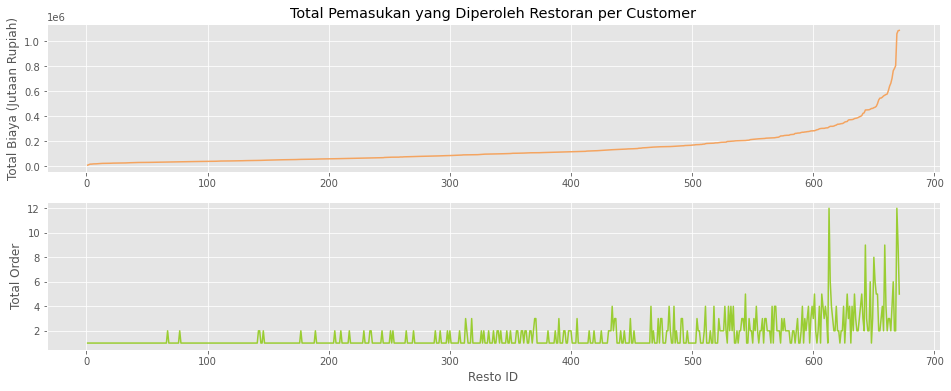

In [18]:
%matplotlib inline

plt.style.use('ggplot')

X = final_fd1['order_ID']
Y = final_fd1['total_pemasukan']
Y1 = final_fd1['total_order']
fig, ax = plt.subplots(ncols=1,nrows=2,figsize=(16,6))

ax[0].plot(X, Y, color='sandybrown')
ax[0].set_title('Total Pemasukan yang Diperoleh Restoran per Customer')
ax[0].set_ylabel('Total Biaya (Jutaan Rupiah)')

ax[1].plot(X, Y1, color='yellowgreen')
ax[1].set_xlabel('Resto ID')
ax[1].set_ylabel('Total Order')

plt.show()

In [20]:
final_fd2=final_fd1[final_fd1['total_order']>8]
final_fd2.reset_index()

,resto_id,total_pemasukan,total_order,order_ID
0,742610474,313400,12,613
1,742676756,449400,9,643
2,742731698,568300,9,659
3,742591683,1059700,12,669
4,742622470,1084700,9,670


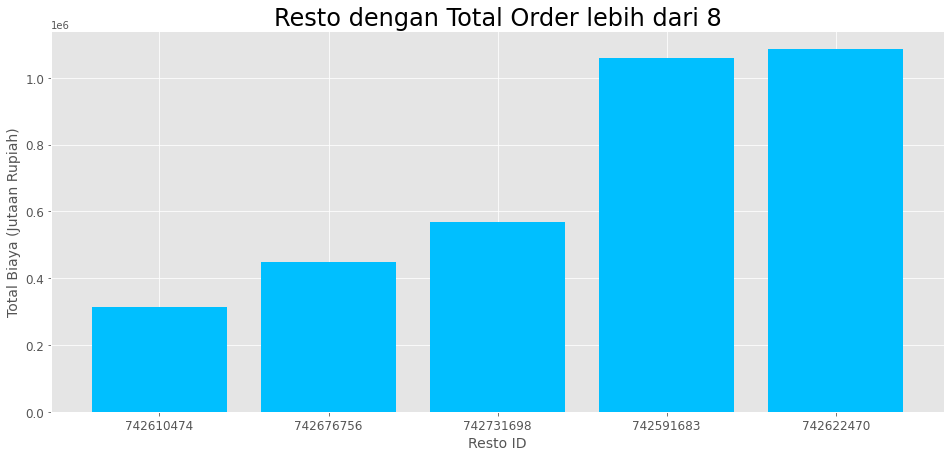

In [22]:
plt.figure(figsize=(16,7))

resto_id=['742610474','742676756','742731698','742591683','742622470']
plt.bar(resto_id, final_fd2['total_pemasukan'], color='deepskyblue')

plt.title('Resto dengan Total Order lebih dari 8', size=24)
plt.xlabel('Resto ID', size=14)
plt.ylabel('Total Biaya (Jutaan Rupiah)', size=14)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()